# Flux Zeropoint calculator



In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
F_nu = 3631e-23*(u.erg/u.s/u.cm**2/u.Hz) #in cgs erg/s/cm^2/Hz
wavelength = np.linspace(1000,13000,1000)*u.AA

In [3]:
F_lam = (F_nu*const.c.cgs/((wavelength)**2.)).to(u.erg/u.s/u.cm**2/u.AA)

In [5]:
desg_w, desg_t = np.loadtxt('./DES_filters/DES_20130322_g.fil', unpack=True, dtype=float,skiprows=1)
desr_w, desr_t = np.loadtxt('./DES_filters/DES_20130322_r.fil', unpack=True, dtype=float,skiprows=1)
desi_w, desi_t = np.loadtxt('./DES_filters/DES_20130322_i.fil', unpack=True, dtype=float,skiprows=1)
desz_w, desz_t = np.loadtxt('./DES_filters/DES_20130322_z.fil', unpack=True, dtype=float,skiprows=1)

In [6]:
filt_int = np.interp(wavelength, desg_w,desg_t)
filtspec = filt_int*F_lam
fluxg = np.trapz(filtspec,wavelength)

filt_int = np.interp(wavelength, desr_w,desr_t)
filtspec = filt_int*F_lam
fluxr = np.trapz(filtspec,wavelength)

filt_int = np.interp(wavelength, desi_w,desi_t)
filtspec = filt_int*F_lam
fluxi = np.trapz(filtspec,wavelength)

filt_int = np.interp(wavelength, desz_w,desz_t)
filtspec = filt_int*F_lam
fluxz = np.trapz(filtspec,wavelength)

In [8]:
mat_c = {'g':'#4CAF50','r':'#FF9800','i':'#f44336','z':'#607D8B'}

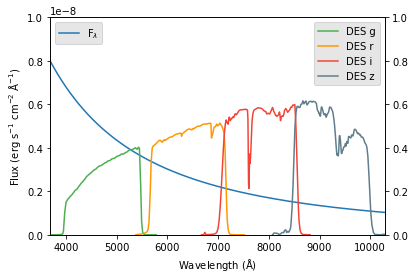

In [33]:
ax1 = plt.subplot(111)
ax1.plot(wavelength,F_lam, label=r'F$_\lambda$')
#ax1.set_xscale('log')
legend=ax1.legend(loc=2, frameon=True)
frame=legend.get_frame()
frame.set_facecolor('#E0E0E0')
ax1.set_ylabel(r'Flux (erg s$^{-1}$ cm$^{-2}$ $\mathrm{\AA}^{-1}$)')
ax1.set_xlabel(r'Wavelength ($\mathrm{\AA}$)')

ax2 = plt.twinx(ax1)
ax2.plot(desg_w,desg_t, label='DES g',c=mat_c['g'])
ax2.plot(desr_w,desr_t, label='DES r',c=mat_c['r'])
ax2.plot(desi_w,desi_t, label='DES i',c=mat_c['i'])
ax2.plot(desz_w,desz_t, label='DES z',c=mat_c['z'])
ax2.set_ylim(0,1)

ax2.set_xlim(min(desg_w),max(desz_w))
ax1.set_ylim(0,1e-8)
legend=ax2.legend(loc=1, frameon=True)
frame=legend.get_frame()
frame.set_facecolor('#E0E0E0')

In [11]:
fluxes = [fluxg.value,fluxr.value,fluxi.value,fluxz.value]

### Flux Zeropoints

In [14]:
print([x for x in fluxes])

[2.207428928641595e-06, 1.8810232736981793e-06, 1.4756367039696678e-06, 1.0147744768288583e-06]


### Mag Zeropoints

In [15]:
print([-2.5*np.log10(x) for x in fluxes])

[14.140283175656457, 14.314014577343933, 14.577551377423664, 14.984076161252354]
